<a href="https://colab.research.google.com/github/R-it-a/Estrutura-de-dados/blob/main/Agoravai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
!pip install swifter
from sklearn.utils import shuffle
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers

educacao = pd.read_csv(
    '/content/drive/MyDrive/MICRODADOS_ENEM_2020.csv', 
    error_bad_lines=False, 
    sep = ";", 
    encoding = 'ISO-8859-1',
    usecols=["NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_CN", "TP_SEXO", "TP_COR_RACA", "Q001", "Q002", "Q006", "Q025"]
) 

# Filtra apenas as raças branca e não branca
educacao = educacao[educacao['TP_COR_RACA'].isin([1, 2, 3, 4, 5])]

# Divide a amostra em grupos antes de criar as variáveis dummy para TP_SEXO
grupo_f_branco = educacao[(educacao['TP_COR_RACA'] == 1) & (educacao['TP_SEXO'] == 'F')]
grupo_f_nao_branco = educacao[(educacao['TP_COR_RACA'] != 1) & (educacao['TP_SEXO'] == 'F')]
grupo_m_branco = educacao[(educacao['TP_COR_RACA'] == 1) & (educacao['TP_SEXO'] == 'M')]
grupo_m_nao_branco = educacao[(educacao['TP_COR_RACA'] != 1) & (educacao['TP_SEXO'] == 'M')]

# Transforma a variável TP_SEXO em binária para cada grupo
grupo_f_branco = pd.get_dummies(grupo_f_branco, columns=['TP_SEXO'])
grupo_f_nao_branco = pd.get_dummies(grupo_f_nao_branco, columns=['TP_SEXO'])
grupo_m_branco = pd.get_dummies(grupo_m_branco, columns=['TP_SEXO'])
grupo_m_nao_branco = pd.get_dummies(grupo_m_nao_branco, columns=['TP_SEXO'])

import seaborn as sn

import swifter
def my_func(row):
    if row['TP_COR_RACA'] == 1:
        val = 'branco'
    else:
        val = 'nao_branco'
    return val

# Cria uma nova coluna 'cor' com as raças branca e não branca
educacao['cor'] = educacao.swifter.apply(my_func, axis=1)

# Remove as observações com dados faltantes
educacao = educacao.dropna()

# Cria os 4 grupos
grupos = ['F_branco', 'F_nao_branco', 'M_branco', 'M_nao_branco']

# Seleciona apenas o grupo F_nao_branco
grupo = 'F_nao_branco'
print('Grupo:', grupo)
grupo_df = educacao[educacao['cor'] == grupo]
X = grupo_df[['Q006']]
y = grupo_df['NU_NOTA_MT']

# Cria o modelo de rede neural
model = tf.keras.Sequential([
    layers.Dense(10, activation='relu'),
    layers.Dense(1)
])

#


Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 KB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.5 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=a30323e4ce71df81ce3c8fd10c5621ffbd696facf752e249ae1ca83ee1a23fc5
  Stored in directory: /root/.cache/pip/wheels/2b/5e/f2/3931524f702ffd03309e96d35ee2fbf9c61c27377511ee8d4c
Successfully built swifter


<ipython-input-1-4fdf8fd0459c>:11: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  educacao = pd.read_csv(


Pandas Apply:   0%|          | 0/5666226 [00:00<?, ?it/s]

Grupo: F_nao_branco


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split


In [ ]:
renda = educacao[['NU_NOTA_MT', 'Q006']]


In [ ]:
renda = pd.get_dummies(renda, columns=['Q006'])


In [ ]:
X = renda.drop('NU_NOTA_MT', axis=1)
y = renda['NU_NOTA_MT']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(1)
])


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
62798/62798 [==============================] - 102s 2ms/step - loss: 24084.3203 - mae: 109.0955 - val_loss: 10689.8789 - val_mae: 83.7673
Epoch 2/10
62798/62798 [==============================] - 103s 2ms/step - loss: 10661.2197 - mae: 83.5397 - val_loss: 10689.9531 - val_mae: 83.6814
Epoch 3/10
62798/62798 [==============================] - 96s 2ms/step - loss: 10661.1211 - mae: 83.5362 - val_loss: 10691.3291 - val_mae: 83.6709
Epoch 4/10
62798/62798 [==============================] - 103s 2ms/step - loss: 10661.0840 - mae: 83.5388 - val_loss: 10689.7637 - val_mae: 83.7536
Epoch 5/10
62798/62798 [==============================] - 103s 2ms/step - loss: 10661.3711 - mae: 83.5394 - val_loss: 10690.0352 - val_mae: 83.7036
Epoch 6/10
62798/62798 [==============================] - 95s 2ms/step - loss: 10661.2539 - mae: 83.5382 - val_loss: 10689.4502 - val_mae: 83.7059
Epoch 7/10
62798/62798 [==============================] - 96s 2ms/step - loss: 10661.1582 - mae: 83.5385 - val_lo

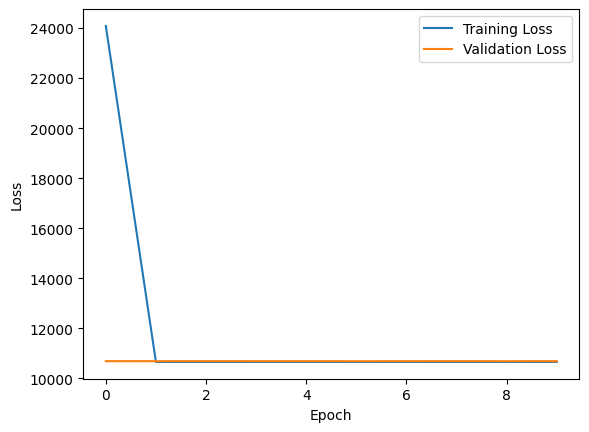

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Leitura do arquivo CSV
educacao = pd.read_csv(
    '/content/drive/MyDrive/MICRODADOS_ENEM_2020.csv', 
    error_bad_lines=False, 
    sep = ";", 
    encoding = 'ISO-8859-1',
    usecols=["NU_NOTA_MT", "Q006"]
) 

# Remove as observações com dados faltantes
educacao = educacao.dropna()

# Transforma variável Q006 em numérica utilizando LabelEncoder
label_encoder = LabelEncoder()
educacao['Q006'] = label_encoder.fit_transform(educacao['Q006'])

# Embaralha as amostras
educacao = shuffle(educacao, random_state=42)

# Separa as variáveis explicativas da variável alvo
renda = educacao['Q006']
nota_mt = educacao['NU_NOTA_MT']

# Divide os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    renda, nota_mt, test_size=0.3, random_state=42)

# Define a estrutura do modelo
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu'))
model.add(Dense(1))

# Compila o modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Treina o modelo
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Avalia o modelo no conjunto de testes
score = model.evaluate(X_test, y_test)
print('Test loss:', score)

# Faz previsões no conjunto de testes
y_pred = model.predict(X_test)


Epoch 1/10
56217/56217 [==============================] - 74s 1ms/step - loss: 30919.0430
Epoch 2/10
56217/56217 [==============================] - 72s 1ms/step - loss: 10865.3965
Epoch 3/10
56217/56217 [==============================] - 74s 1ms/step - loss: 10865.2578
Epoch 4/10
56217/56217 [==============================] - 72s 1ms/step - loss: 10865.3760
Epoch 5/10
56217/56217 [==============================] - 74s 1ms/step - loss: 10865.0508
Epoch 6/10
56217/56217 [==============================] - 73s 1ms/step - loss: 10865.4541
Epoch 7/10
56217/56217 [==============================] - 74s 1ms/step - loss: 10865.2783
Epoch 8/10
56217/56217 [==============================] - 74s 1ms/step - loss: 10865.0547
Epoch 9/10
56217/56217 [==============================] - 78s 1ms/step - loss: 10865.1611
Epoch 10/10
24093/24093 [==============================] - 26s 1ms/step - loss: 10841.1465
Test loss: 10841.146484375
24093/24093 [==============================] - 24s 986us/step


80309/80309 [==============================] - 82s 1ms/step


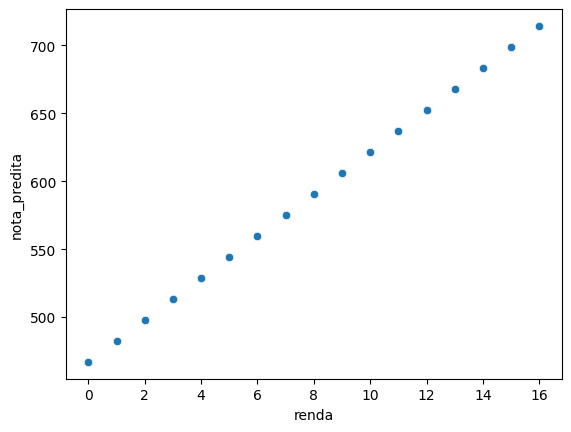

In [ ]:
#importa biblioteca seaborn
import seaborn as sns


# Gera as previsões do modelo para a renda
y_pred = model.predict(renda)

# Cria um novo DataFrame com a renda e a nota prevista
predicoes = pd.DataFrame({'renda': renda.squeeze(), 'nota_predita': y_pred.squeeze()})

# Plota a relação entre a renda e a nota prevista
sns.scatterplot(data=predicoes, x='renda', y='nota_predita')
plt.show()
